In [8]:
cd ..

C:\Users\Administrator\Desktop\datacampus


In [1]:
#######################################################
# import
#######################################################

import os
import sys
import time
import cv2
import pafy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K

os.chdir('./yoloface')
from yoloface_copy2 import detect_crop
from utils import *


#######################################################
# model setting
#######################################################

CONF_THRESHOLD = 0.5
NMS_THRESHOLD = 0.4
IMG_WIDTH = 416
IMG_HEIGHT = 416

# Give the configuration and weight files for the model and load the network
# using them.
weights_path = os.path.join('./model-weights/yolov3-wider_16000.weights')
config_path = os.path.join('./cfg/yolov3-face.cfg')
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# load model
model = keras.models.load_model('./transfer_learning/model/weight_1.hdf5')


#######################################################
# function
#######################################################

# youtube 영상 캡쳐

def video_capture(video_url, sec):
    
    # video_url 지정 필요
    video = pafy.new(video_url)  # pafy 패키지로 객체를 형성합니다.
    best = video.getbest(preftype="mp4")
    capture = cv2.VideoCapture(best.url)
    capture.open(best.url)  # openCV가 인식하게 만들어줍니다.

    # 초당 프레임 수를 get 클래스로 계산해 변수에 담음
    fps = capture.get(cv2.CAP_PROP_FPS) 
    # 영상의 총 프레임 수를 get 클래스로 계산해 변수에 담음
    frame_count = capture.get(cv2.CAP_PROP_FRAME_COUNT)

    timestamps = [capture.get(cv2.CAP_PROP_POS_MSEC)]
    calc_timestamps = [0.0]
    
    print(f"플레이길이(초): {video.length}")
    
    # second_set : 캡처할 위치 지정 필요
    capture.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    ret, frame = capture.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print(sec, "초 에서 캡쳐")
    
    return frame_rgb


# facedetection - yolo

def facedetection(frame):
    
        # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (IMG_WIDTH, IMG_HEIGHT),
                                    [0, 0, 0], 1, crop=False)

        # Sets the input to the network
    net.setInput(blob)

        # Runs the forward pass to get output of the output layers
    outs = net.forward(get_outputs_names(net))
    
        # Remove the bounding boxes with low confidence
    faces = post_process(frame, outs, CONF_THRESHOLD, NMS_THRESHOLD)
    print('# detected faces: {}'.format(len(faces)))
    print()

        # initialize the set of information we'll displaying on the frame
    info = [
        ('number of faces detected', '{}'.format(len(faces)))
    ]
    
    crop_list=[]

    for i in range(len(faces)):
        crop = frame[faces[i][1]:faces[i][1]+faces[i][3],faces[i][0]:faces[i][0]+faces[i][2]]
        crop_list.append(crop)
    return crop_list


# [최종 모델] 얼굴 인식

def img_recognition(video_url, sec):
    frame = video_capture(video_url, sec)
    detected_img_list = facedetection(frame)

    targetx = 224
    targety = 224

    for image in detected_img_list :
        img = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC)
        X = img.astype("float") / 256
        X = X.reshape(-1, targetx, targety,3)
        categories = ["cha", "choi", "hyena", "jeonga", "jjin", "junho", "lee", "woo", "yeseo", "yoon", ]
        pred = model.predict(X)
        result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
        print('New image prediction : ',categories[result[0]])
        print("accuracy : {}".format(max(pred[0])))
        plt.imshow(image)
        plt.show()

C:\Users\Administrator\anaconda3\envs\face_recognition\lib\site-packages\tensorflow\python\keras\layers\core.py:1061: UserWarning: inception_resnet_v1_lcl is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


플레이길이(초): 392
205 초 에서 캡쳐
# detected faces: 2

New image prediction :  cha
accuracy : 0.9813882112503052


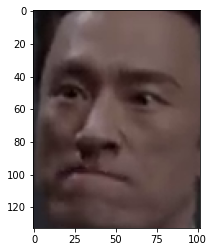

New image prediction :  yoon
accuracy : 0.4881274700164795


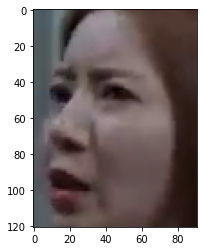

In [13]:
from utils import *
img_recognition("https://youtu.be/l9_V93YLKXM", 205)

플레이길이(초): 392
10.05 초 에서 캡쳐
# detected faces: 2

New image prediction :  cha
accuracy : 0.8260952234268188


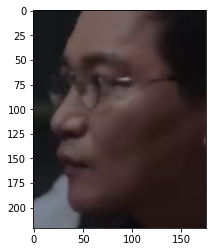

New image prediction :  cha
accuracy : 0.4958329498767853


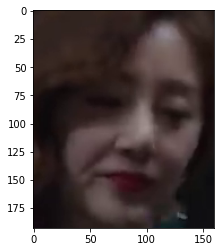

In [12]:
from utils1 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 10.05)

플레이길이(초): 392
205 초 에서 캡쳐
# detected faces: 2

New image prediction :  cha
accuracy : 0.9999465942382812


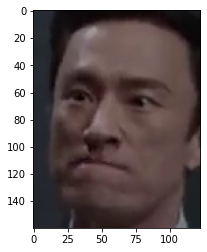

New image prediction :  yoon
accuracy : 0.6625536680221558


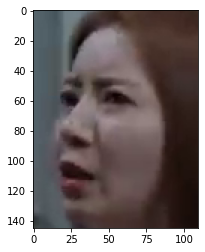

In [14]:
from utils2 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 205)

플레이길이(초): 392
205 초 에서 캡쳐
# detected faces: 2

New image prediction :  cha
accuracy : 0.9999710321426392


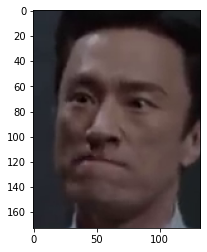

New image prediction :  yoon
accuracy : 0.9816465973854065


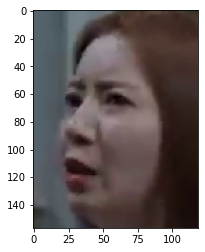

In [5]:
from utils3 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 205)

플레이길이(초): 392
10.04 초 에서 캡쳐
# detected faces: 2

New image prediction :  junho
accuracy : 0.4912753403186798


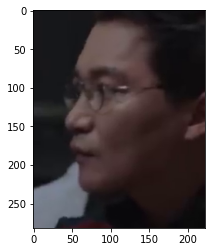

New image prediction :  jjin
accuracy : 0.9315388798713684


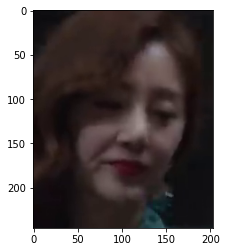

In [4]:
from utils4 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 10.04)

플레이길이(초): 392
10.04 초 에서 캡쳐
# detected faces: 2

New image prediction :  woo
accuracy : 0.45836809277534485


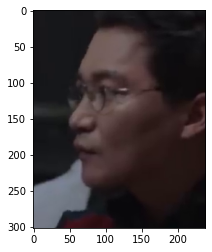

New image prediction :  jjin
accuracy : 0.9492480754852295


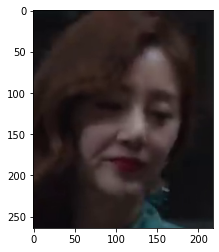

In [3]:
from utils5 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 10.04)

플레이길이(초): 392
205 초 에서 캡쳐
# detected faces: 2

New image prediction :  cha
accuracy : 0.9999250173568726


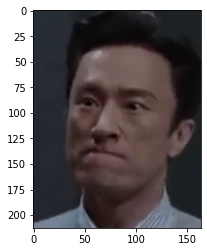

New image prediction :  yoon
accuracy : 0.9337399005889893


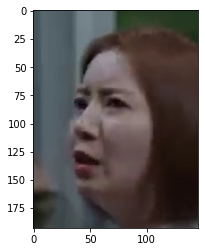

In [6]:
from utils6 import *
img_recognition("https://youtu.be/l9_V93YLKXM", 205)